In [4]:
%matplotlib inline
import pandas as pd

In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [7]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Lucky Number,2015,USA,2015-09-01


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

/Users/rtindru/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


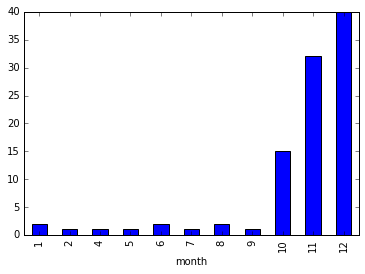

In [24]:
c = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
c['month'] = c.date.dt.month
c.groupby('month').size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

/Users/rtindru/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


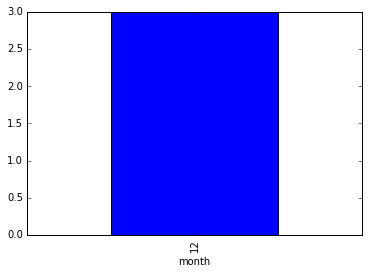

In [26]:
c = release_dates[(release_dates.title.str.startswith('The Hobbit')) & (release_dates.country == 'USA')]
c['month'] = c.date.dt.month
c.groupby('month').size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

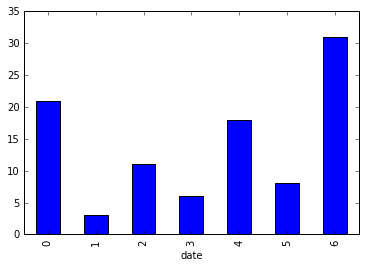

In [30]:
r = release_dates[(release_dates.title.str.contains("Romance")) & (release_dates.country == 'USA')]
r.groupby(r.date.dt.dayofweek).size().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

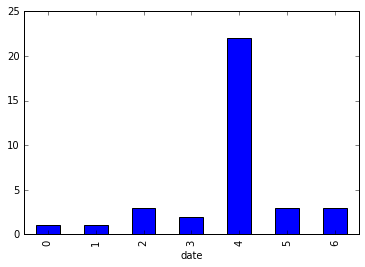

In [59]:
r = release_dates[(release_dates.title.str.contains("Action")) & (release_dates.country == 'USA')]
r.groupby(r.date.dt.dayofweek).size().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [67]:
c = cast[(cast.name == 'Judi Dench') & (cast.year // 10 * 10 == 1990)]
c.head()

8

In [68]:
usa = release_dates[release_dates.country == 'USA']
r = c.merge(usa)
r.head()

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08


### In which months do films with Judi Dench tend to be released in the USA?

/Users/rtindru/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


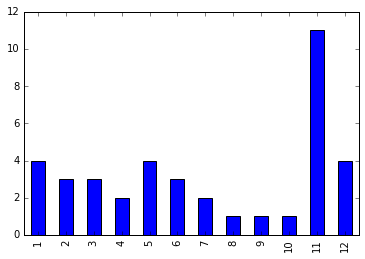

In [69]:
# In which months do films with Judi Dench tend to be released in the USA?

c = cast
c = c[c.name == 'Judi Dench']
m = c.merge(usa).sort('date')
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [52]:
t = cast[cast.name == 'Tom Cruise']
t = t.merge(release_dates[release_dates.country == 'USA'])

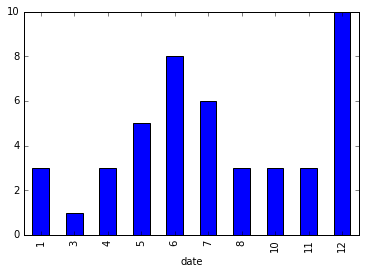

In [53]:
t.groupby(t.date.dt.month).size().plot(kind='bar')